# BBC News NLP
An analysis of BBC News articles, using NLP. [Data is available here](http://mlg.ucd.ie/datasets/bbc.html).

Objectives:
* Use the full text dataset and classify each existing category into sub-categories: 
    * Breakdown ‘Business’ into stock market, company news, mergers and acquisitions etc. 
    * Breakdown ‘Entertainment’ into cinema, theatre, music, literature, personality etc. 
    * Breakdown ‘Sports’ into the type of sport: cricket, football, Olympics etc. 
    * Please create as many categories as you feel are appropriate. 
* Identify documents and extract the named entities for media personalities, clearly identifying their jobs (e.g. Politicians, TV/Film Personalities, Musicians)
* Extract summaries of anything that took place or is/was scheduled to take place in April.

In [1]:
# Load Libraries
import pandas as pd
import re
import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import os

In [3]:
# Load the files
parent_folder = "C:\\Users\\User\\Documents\\Projects\\BBC_News_NLP\\Data\\bbc"

category_folders = []
for folder in os.listdir(parent_folder):
    path = os.path.join(parent_folder, folder)

    if os.path.isdir(path):
        category_folders.append(path)

articles_list = []
for category in category_folders:
    for article in os.listdir(category):
        if article.endswith(".txt") and not article.startswith("README"):
            article_path = os.path.join(category, article)
            try: 
                with open(article_path, "r") as file:
                    article_text = file.read()
                    articles_list.append({"text" : article_text, "category" : os.path.relpath(category, parent_folder)})
            except: 
                print(f"Could not load {article_path}")

articles = pd.DataFrame(articles_list)

print(f"{len(articles)} articles loaded")
articles.head()

2225 articles loaded


,text,category
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


### Process the files for analysis
Using tokenisation, lemmatising, stemming, and by removing stopwords.


In [4]:
#sentence tokenisation:
first_article = articles["text"][0]

first_article_sentences = sent_tokenize(articles["text"][0])
print("Sentence tokenisation:", first_article_sentences[:3], sep="\n")

print("\nWord tokenisation:")
# word tokenisation
for sentence in first_article_sentences[:3]:
    print(word_tokenize(sentence), "\n")

first_sentence = first_article_sentences[0]

Sentence tokenisation:
['Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the three months to December, from $639m year-earlier.', 'The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales.', 'TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn.']

Word tokenisation:
['Ad', 'sales', 'boost', 'Time', 'Warner', 'profit', 'Quarterly', 'profits', 'at', 'US', 'media', 'giant', 'TimeWarner', 'jumped', '76', '%', 'to', '$', '1.13bn', '(', 'Â£600m', ')', 'for', 'the', 'three', 'months', 'to', 'December', ',', 'from', '$', '639m', 'year-earlier', '.'] 

['The', 'firm', ',', 'which', 'is', 'now', 'one', 'of', 'the', 'biggest', 'investors', 'in', 'Google', ',', 'benefited', 'from', 'sales', 'of', 'high-speed', 'internet', 'connections', 'and', 'higher', 'advert', 'sales', '.'] 

['TimeWarner', 'said', 'fourth', 'quarter', 'sal

In [5]:
# Remove stopwords
stopwords_list = stopwords.words('english')
print(stopwords_list)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [6]:
print("Stopwords: ", [word for word in word_tokenize(first_sentence) if word.lower() in stopwords_list])
print("Cleaned sentence: ", [word for word in word_tokenize(first_sentence) if word.lower() not in stopwords_list])

Stopwords:  ['at', 'to', 'for', 'the', 'to', 'from']
Cleaned sentence:  ['Ad', 'sales', 'boost', 'Time', 'Warner', 'profit', 'Quarterly', 'profits', 'US', 'media', 'giant', 'TimeWarner', 'jumped', '76', '%', '$', '1.13bn', '(', 'Â£600m', ')', 'three', 'months', 'December', ',', '$', '639m', 'year-earlier', '.']


In [216]:
# Can also remove punctuation by adding to our stopwords list:
from string import punctuation
print(list(punctuation))
stopwords_list = [*stopwords_list, *list(punctuation), *['``', "''"]]

print("\nStopwords: ", [word for word in word_tokenize(first_sentence) if word.lower() in stopwords_list])
print("Cleaned sentence: ", [word for word in word_tokenize(first_sentence) if word.lower() not in stopwords_list])

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']

Stopwords:  ['at', '%', 'to', '$', '(', ')', 'for', 'the', 'to', ',', 'from', '$', '.']
Cleaned sentence:  ['Ad', 'sales', 'boost', 'Time', 'Warner', 'profit', 'Quarterly', 'profits', 'US', 'media', 'giant', 'TimeWarner', 'jumped', '76', '1.13bn', 'Â£600m', 'three', 'months', 'December', '639m', 'year-earlier']


Stemming and Lemmatisation both seek to reduce words to simpler versions, so similar words can be grouped.

Stemming works by literally reducing the word
* e.g. it might reduce "jumping", "jumps" and "jumper" to just "jump".
* However, in this case, "jumper" is more likely to refer to a type of clothing!

Instead, lemmatisation uses grammar rules and dictionary look ups to attempt reduce the words via their meaning.
* e.g. it might reduce "jumping" and "jumps" to "jump", and keep "jumper" as "jumper" - especially if it 'knows' it's a noun!

Their are many pre-defined stemming and lemmitasing algorithms. Two of the post common are *Porter Stemmer* and *Wordnet Lemmatizer*
 

In [220]:
from nltk.stem import PorterStemmer
print("Stemming (Porter Stemmer):")
for word in ["dancing", "danced", "dance", "dancer", "dances"]:
    print(PorterStemmer().stem(word))

Stemming (Porter Stemmer):
danc
danc
danc
dancer
danc


In [222]:
from nltk.stem import WordNetLemmatizer as WNL
print("Lemmatisation (Wordnet Lemmatizer):")
for word in ["dancing", "danced", "dance", "dancer", "dances"]:
    print(WNL().lemmatize(word))

Lemmatisation (Wordnet Lemmatizer):
dancing
danced
dance
dancer
dance


Accurate lemmatisation requires the algorithm to be able to identify grammatical patterns. This process can be improved using Part-of-Speech (POS) tagging, which is when words in the text are labelled, for example, labelling words as adjectives or adverbs.

POS tagging can also be done by an algorithm, although different algorithms tag differently. The most common is the Penn Treebank algorithm, which uses labels such as NN (for a noun), RB (adverb), VB (verb), VBD (past-tense verb), etc.

However for WordNet Lemmatisation (WNL), we only need to label ADJ (adjectives), VERB (verbs), NOUN (nouns), ADV (adverbs).

We can therefore use Penn Treebank POS-tagging, but simplify to the tags used by WNL:

In [224]:
from nltk import pos_tag

# Assign Penn Treebank tags:
print("Penn Treebank POS-tags:\n", pos_tag(word_tokenize(first_sentence)))

# Define a function to convert Penn Treebank POS to WNL tags
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN 

WN_pos_tags = []
for word, tag in pos_tag(word_tokenize(first_sentence)):
    WN_tag = get_wordnet_pos(tag)
    WN_pos_tags.append((word, WN_tag))

print("WNL POS-tags:\n", WN_pos_tags)


Penn Treebank POS-tags:
 [('Ad', 'NN'), ('sales', 'NNS'), ('boost', 'VBP'), ('Time', 'NNP'), ('Warner', 'NNP'), ('profit', 'VB'), ('Quarterly', 'JJ'), ('profits', 'NNS'), ('at', 'IN'), ('US', 'NNP'), ('media', 'NNS'), ('giant', 'JJ'), ('TimeWarner', 'NNP'), ('jumped', 'VBD'), ('76', 'CD'), ('%', 'NN'), ('to', 'TO'), ('$', '$'), ('1.13bn', 'CD'), ('(', '('), ('Â£600m', 'NN'), (')', ')'), ('for', 'IN'), ('the', 'DT'), ('three', 'CD'), ('months', 'NNS'), ('to', 'TO'), ('December', 'NNP'), (',', ','), ('from', 'IN'), ('$', '$'), ('639m', 'CD'), ('year-earlier', 'JJ'), ('.', '.')]
WNL POS-tags:
 [('Ad', 'n'), ('sales', 'n'), ('boost', 'v'), ('Time', 'n'), ('Warner', 'n'), ('profit', 'v'), ('Quarterly', 'a'), ('profits', 'n'), ('at', 'n'), ('US', 'n'), ('media', 'n'), ('giant', 'a'), ('TimeWarner', 'n'), ('jumped', 'v'), ('76', 'n'), ('%', 'n'), ('to', 'n'), ('$', 'n'), ('1.13bn', 'n'), ('(', 'n'), ('Â£600m', 'n'), (')', 'n'), ('for', 'n'), ('the', 'n'), ('three', 'n'), ('months', 'n'), ('to

We can now perform lemmatisation:

In [226]:
# Original
print("Original: ", " ".join(word_tokenize(first_sentence)))

#Without POS tagging:
print("\nDefault WNL: ", " ".join([WNL().lemmatize(word.lower()) for word in word_tokenize(first_sentence)]))

# With POS tagging:
print("\nPOS-tagged WNL: ", " ".join([WNL().lemmatize(word.lower(), pos=tag) for word, tag in WN_pos_tags]))

Original:  Ad sales boost Time Warner profit Quarterly profits at US media giant TimeWarner jumped 76 % to $ 1.13bn ( Â£600m ) for the three months to December , from $ 639m year-earlier .

Default WNL:  ad sale boost time warner profit quarterly profit at u medium giant timewarner jumped 76 % to $ 1.13bn ( â£600m ) for the three month to december , from $ 639m year-earlier .

POS-tagged WNL:  ad sale boost time warner profit quarterly profit at u medium giant timewarner jump 76 % to $ 1.13bn ( â£600m ) for the three month to december , from $ 639m year-earlier .


In [228]:
# Convert this into a function to take a sentence at a time:
def WNL_sentence(input_text):
    tagged_text = []
    for word, tag in pos_tag(word_tokenize(input_text)):
        tagged_text.append((word, get_wordnet_pos(tag)))
        
    output_text = [WNL().lemmatize(word.lower(), pos=tag) for word, tag in tagged_text]
    return(output_text)

print(WNL_sentence(first_article_sentences[2]))

['timewarner', 'say', 'fourth', 'quarter', 'sale', 'rise', '2', '%', 'to', '$', '11.1bn', 'from', '$', '10.9bn', '.']


In [347]:
# We can combine all this into one pre-processing function:
def preprocess_sentence(input_text):
    tagged_text = []
    for word, tag in pos_tag(word_tokenize(input_text)):
        tagged_text.append((word, get_wordnet_pos(tag)))
        
    lemma_text = [WNL().lemmatize(word.lower(), pos=tag) for word, tag in tagged_text]
    processed_text = [word for word in lemma_text if word not in stopwords_list]
    return processed_text

preprocess_sentence("Today I am performing some text analysis on BBC News articles, which will be fun!")
    

['today', 'perform', 'text', 'analysis', 'bbc', 'news', 'article', 'fun']

### Perform some basic analysis

In [401]:
# Process some sentences from our articles:
test_article = articles["text"][68]
test_sentence = sent_tokenize(test_article)[10]
processed_sentence = preprocess_sentence(test_sentence)
print("test_sentence: ", test_sentence)
print("\nProcessed test_sentence: ", processed_sentence)

test_sentence:  "Boeing has the latest variant in a very successful line of airplanes and there is no doubt it will continue to be very successful," said David Learmount, operations and safety editor at industry magazine Flight International.

Processed test_sentence:  ['boeing', 'late', 'variant', 'successful', 'line', 'airplane', 'doubt', 'continue', 'successful', 'say', 'david', 'learmount', 'operation', 'safety', 'editor', 'industry', 'magazine', 'flight', 'international']


In [432]:
from collections import Counter

# We can count the occurence of words (into a "Bag-of-words"):
print(Counter(processed_sentence))

Counter({'successful': 2, 'boeing': 1, 'late': 1, 'variant': 1, 'line': 1, 'airplane': 1, 'doubt': 1, 'continue': 1, 'say': 1, 'david': 1, 'learmount': 1, 'operation': 1, 'safety': 1, 'editor': 1, 'industry': 1, 'magazine': 1, 'flight': 1, 'international': 1})


In [434]:
# And can convert these into a vector:
counts_series = pd.Series(Counter(processed_sentence)).to_frame().T
counts_series

,boeing,late,variant,successful,line,airplane,doubt,continue,say,david,learmount,operation,safety,editor,industry,magazine,flight,international
0,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1


We can also use scikit-learn to vectorise our our test article (note that CountVectorizer requires a text file or a list of strings!):

In [448]:
from sklearn.feature_extraction.text import CountVectorizer

Count_Vector = CountVectorizer() # initiate default vectoriser
Count_Vector.fit_transform([test_sentence])

print(Count_Vector.vocabulary_) # NB: the numbers are indices, not counts!

{'boeing': 4, 'has': 10, 'the': 26, 'latest': 16, 'variant': 29, 'in': 11, 'very': 30, 'successful': 25, 'line': 18, 'of': 21, 'airplanes': 0, 'and': 1, 'there': 27, 'is': 14, 'no': 20, 'doubt': 7, 'it': 15, 'will': 31, 'continue': 5, 'to': 28, 'be': 3, 'said': 24, 'david': 6, 'learmount': 17, 'operations': 22, 'safety': 23, 'editor': 8, 'at': 2, 'industry': 12, 'magazine': 19, 'flight': 9, 'international': 13}


Also note that minimal processing has been done on this string; stop words haven't been removed and the string hasn't been lemmatised.

We can pass our custom preprocessing function in the initial settings:

In [538]:
Count_Vector2 = CountVectorizer(analyzer = preprocess_sentence)
vectorised = Count_Vector2.fit_transform([test_sentence, test_sentence2])
print(Count_Vector2.vocabulary_)

{'boeing': 3, 'late': 12, 'variant': 26, 'successful': 25, 'line': 15, 'airplane': 1, 'doubt': 7, 'continue': 4, 'say': 23, 'david': 6, 'learmount': 13, 'operation': 19, 'safety': 22, 'editor': 8, 'industry': 10, 'magazine': 16, 'flight': 9, 'international': 11, 'mr': 18, 'point': 21, '777-200lr': 0, 'market': 17, 'couple': 5, 'year': 27, 'limit': 14, 'success': 24, 'attract': 2, 'order': 20}


In [540]:
# We can print these in index order:
print(Count_Vector2.get_feature_names_out())

['777-200lr' 'airplane' 'attract' 'boeing' 'continue' 'couple' 'david'
 'doubt' 'editor' 'flight' 'industry' 'international' 'late' 'learmount'
 'limit' 'line' 'magazine' 'market' 'mr' 'operation' 'order' 'point'
 'safety' 'say' 'success' 'successful' 'variant' 'year']


In [542]:
# And convert the bag-of-words to a count vector: (one row for each list item)
print(vectorised.toarray())

[[0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 2 1 0]
 [1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1]]


In [567]:
# NB we can perform this over a whole article using the below:
from sklearn.feature_extraction.text import CountVectorizer

print(article_path) # from the 2nd cell of this notebook

with open(article_path, "r") as file:
    vectoriser = CountVectorizer(analyzer = preprocess_sentence)
    vectorised_article = vectoriser.fit_transform(file)
print(vectoriser.get_feature_names_out()[:20])
print(vectorised_article.toarray())

C:\Users\User\Documents\Projects\BBC_News_NLP\Data\bbc\tech\401.txt
["'d" "'em" "'frag" "'ll" "'m" "'needed" "'re" "'real" "'s" "'some"
 "'ummm" "'ve" "'you" '--' '..' '...' '10' '11' '15' '15+']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Advanced Analysis
We can also use ML techniques to analyse our data in more detail!
For instance, we can also develop a Naive Bayes that can predict the subject of our articles:

*Note we could also tune alpha, but for this example we will keep it simple*

In [587]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import random
random.seed(10)

In [581]:
articles.head()

,text,category
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [595]:
# Split into test and training data
X = articles["text"]
Y = articles["category"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# Setup pipeline:pProcess and vectorise, then classify using multinomial Naive Bayes:
NB_model = make_pipeline(CountVectorizer(analyzer = preprocess_sentence), MultinomialNB())

# Train the model:
NB_model.fit(X_train, Y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(analyzer=<function preprocess_sentence at 0x000001C174FEFD80>)),
                ('multinomialnb', MultinomialNB())])

In [610]:
# Evaluate performance

Y_predictions = NB_model.predict(X_test)

print(accuracy_score(Y_test, Y_predictions))
print(classification_report(Y_test, Y_predictions))

0.9640718562874252
               precision    recall  f1-score   support

     business       0.99      0.93      0.95       160
entertainment       0.98      0.93      0.96       126
     politics       0.92      0.98      0.95       121
        sport       1.00      0.99      1.00       145
         tech       0.93      1.00      0.96       116

     accuracy                           0.96       668
    macro avg       0.96      0.97      0.96       668
 weighted avg       0.97      0.96      0.96       668



The model had an accuracy of **96.41%**! We can also visualise these results (and other useful data):

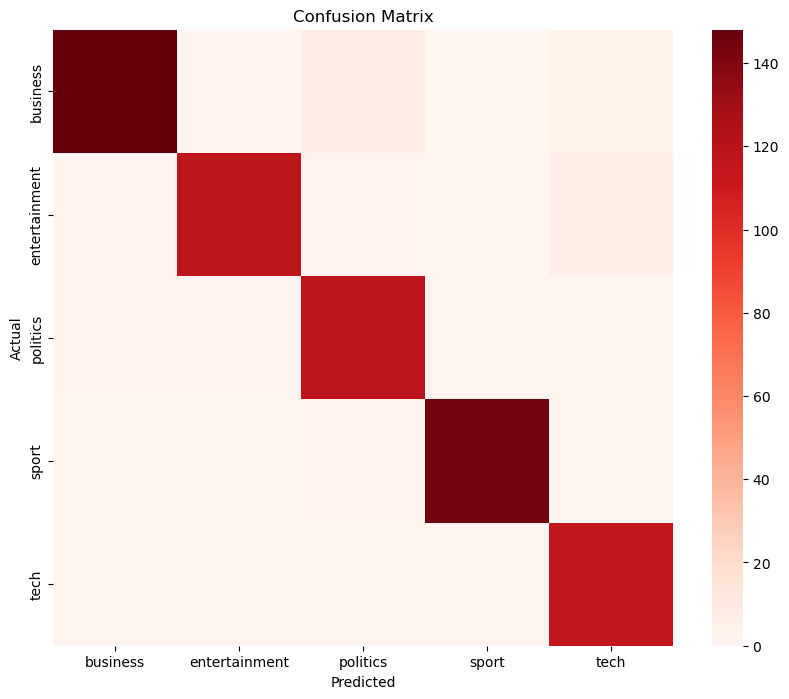

In [635]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Visualise confusion matrix as a heatmap:
conf_mat = confusion_matrix(Y_test, Y_predictions, labels=NB_model.classes_)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=False, xticklabels=NB_model.classes_, yticklabels=NB_model.classes_, cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

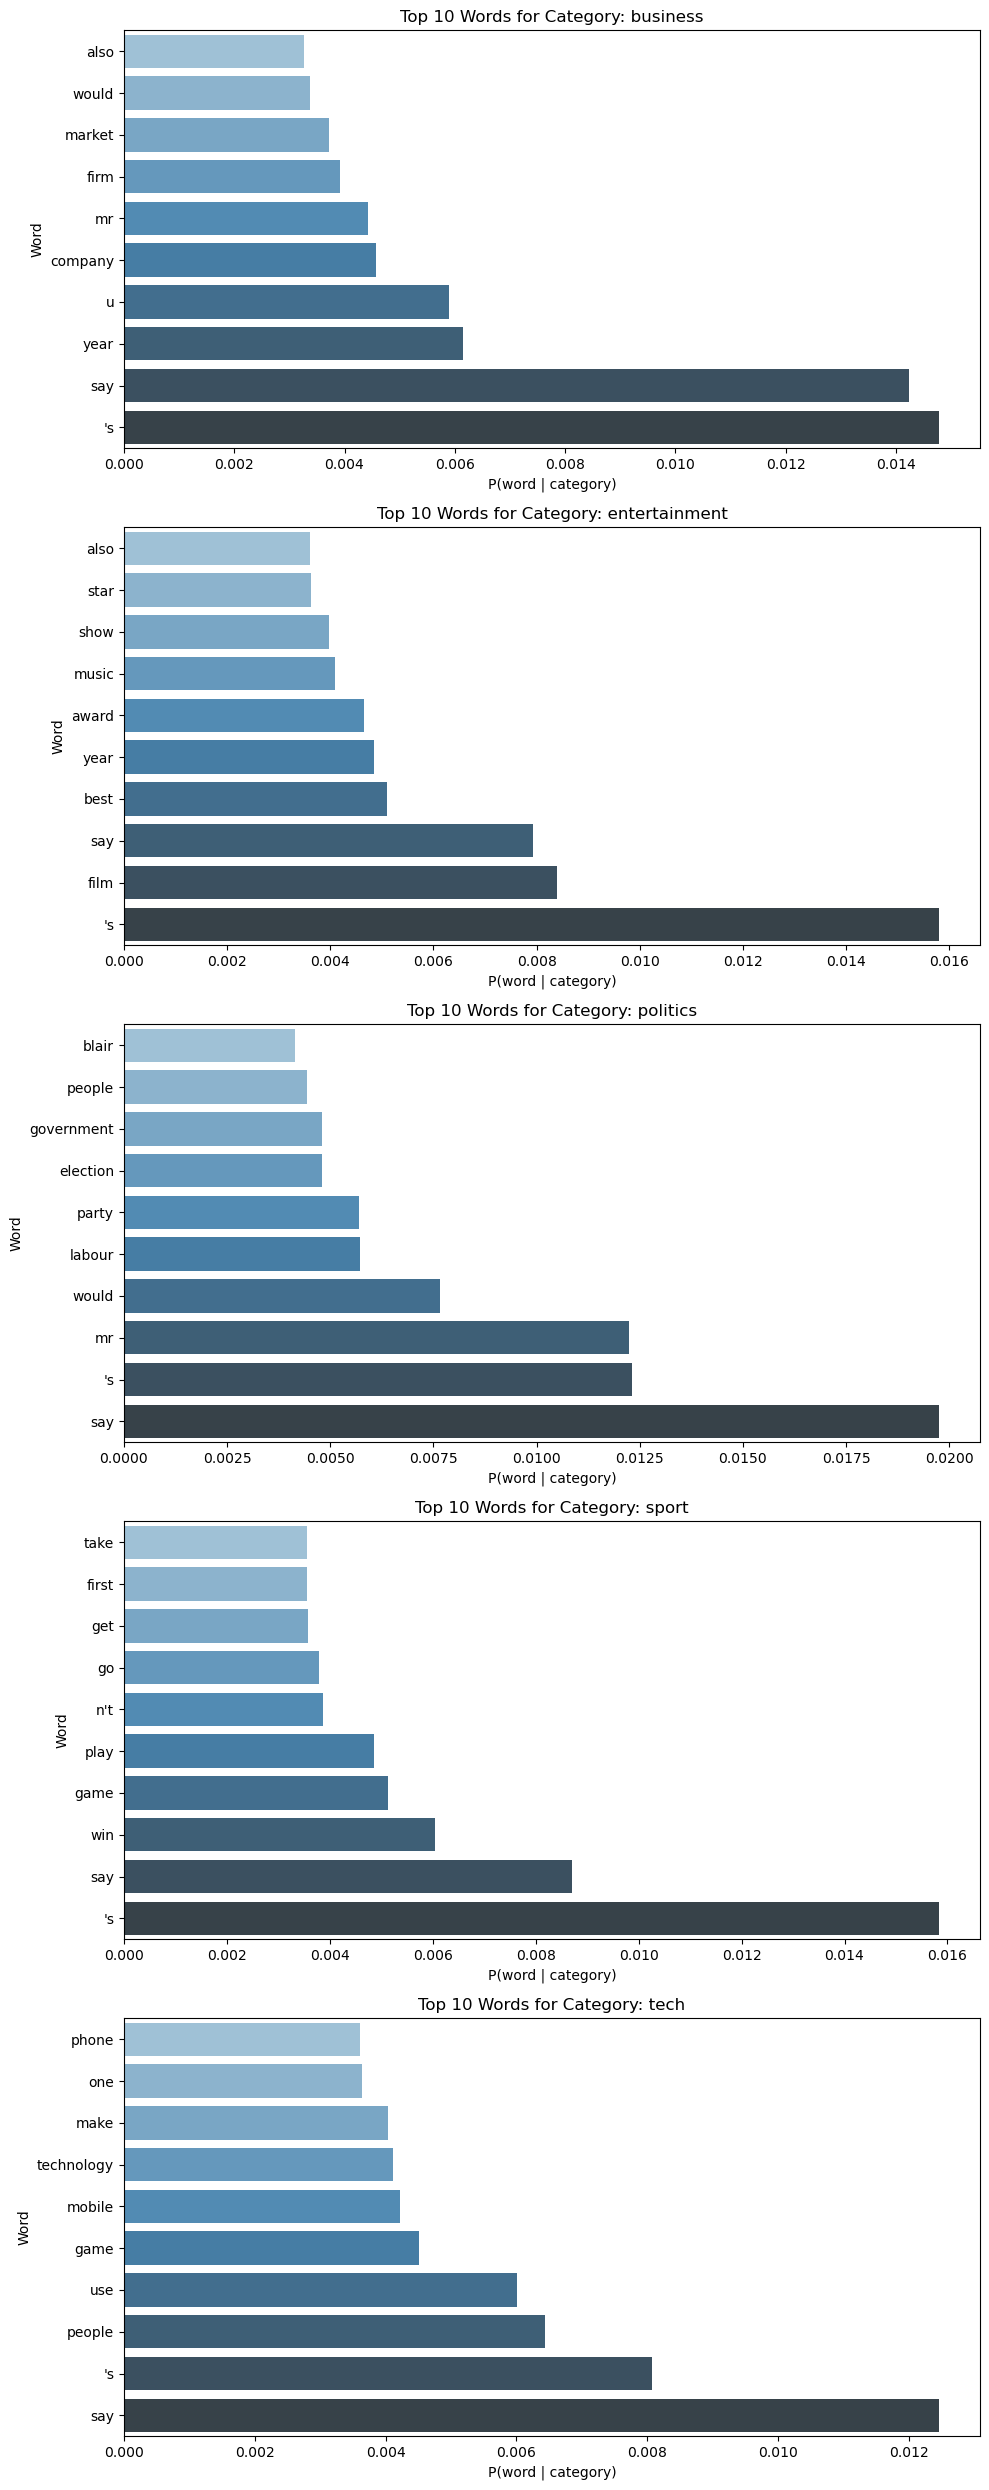

In [643]:
# Visualise most important words per category

import numpy as np

vectorizer = NB_model.named_steps['countvectorizer']
classifier = NB_model.named_steps['multinomialnb']

feature_names = vectorizer.get_feature_names_out()
class_labels = classifier.classes_

top_n = 10  

# Create subplots: one for each class
fig, axes = plt.subplots(len(class_labels), 1, figsize=(10, 5 * len(class_labels)))

for i, class_label in enumerate(class_labels):
    # Get top feature indices for this class
    class_feature_log_probs = classifier.feature_log_prob_[i]
    top_indices = np.argsort(class_feature_log_probs)[-top_n:]
    top_words = feature_names[top_indices]
    top_probs = class_feature_log_probs[top_indices]
    
    # Convert log probs to actual probabilities
    top_probs_exp = np.exp(top_probs)

    # Plot
    sns.barplot(x=top_probs_exp, y=top_words, ax=axes[i], palette="Blues_d")
    axes[i].set_title(f"Top {top_n} Words for Category: {class_label}")
    axes[i].set_xlabel("P(word | category)")
    axes[i].set_ylabel("Word")

plt.tight_layout()
plt.show()


In [655]:
results_df = pd.DataFrame({
    'text': X_test,
    'actual': Y_test,
    'predicted': Y_predictions
})

# Filter misclassified samples
misclassified = results_df[results_df['actual'] != results_df['predicted']]

print(misclassified.sample(10)[['text', 'actual', 'predicted']])


                                                   text         actual  \
132   Salary scandal in Cameroon\n\nCameroon says wi...       business   
234   Pension hitch for long-living men\n\nMale life...       business   
254   Call to overhaul UK state pension\n\nThe UK pe...       business   
212   US bank boss hails 'genius' Smith\n\nUS Federa...       business   
766   Row threatens Hendrix museum plan\n\nProposals...  entertainment   
1033  EU fraud clampdown urged\n\nEU member states a...       politics   
798   Musicians to tackle US red tape\n\nMusicians' ...  entertainment   
165   Crossrail link 'to get go-ahead'\n\nThe Â£10bn...       business   
1035  UK helps raped Rwandan women\n\nBritain is to ...       politics   
646   Glastonbury fans to get ID cards\n\nFans who b...  entertainment   

          predicted  
132        politics  
234        politics  
254        politics  
212        politics  
766        politics  
1033       business  
798        politics  
165      

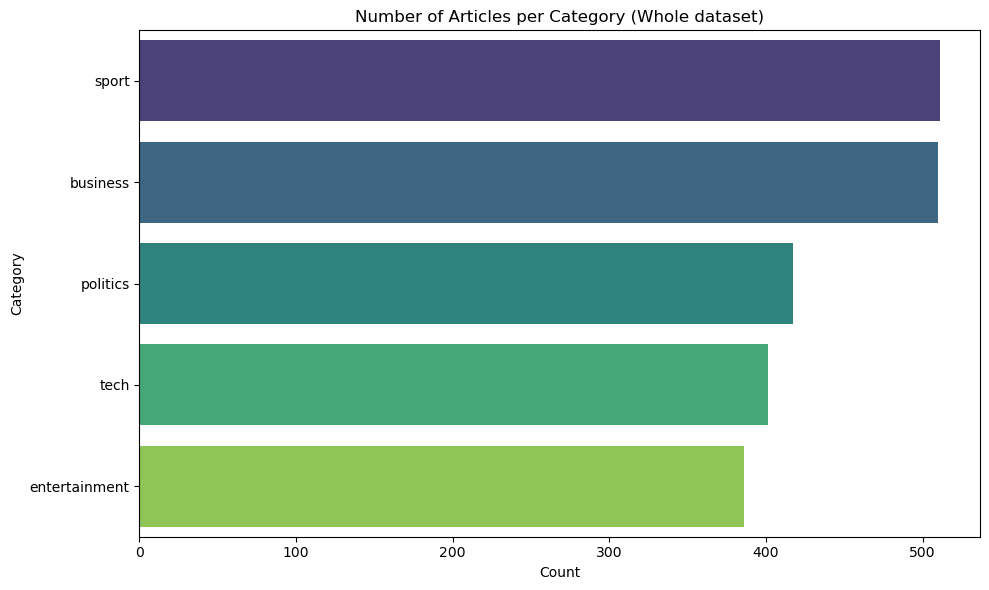

In [657]:
# Set plot size and style
plt.figure(figsize=(10, 6))
sns.countplot(data=articles, y='category', order=articles['category'].value_counts().index, palette='viridis')

plt.title("Number of Articles per Category (Whole dataset)")
plt.xlabel("Count")
plt.ylabel("Category")
plt.tight_layout()
plt.show()